Дифракция в градиентном оптическом волокне

Оптическое градиентное волокно представляет собой цилиндрический (круглый) кабель с показателем преломления, который изменяется в зависимости от расстояния до центра. Чтобы упростить себе работу, мы будем моделировать его только в двумерных декартовых координатах $(x,y)$
Пусть показатель преломления задается функцией $n(x, y) = 2 − y^2$ для $|y| < 1$ и $n(x,y) = 1$ в противном случае. Это соответствует волоконному кабелю шириной 2 вдоль оси $x$, окруженному воздухом или вакуумом. Частные производные составляют $n_x = 0$ и $n_y = −2y$ внутри кабеля и ноль снаружи.
Из этого мы получаем
$$\begin{align}
\dot{v}_x &= \frac{4y}{2-y^2}v_x v_y,\\
\dot{v}_y &= \frac{2y}{2-y^2}v_y^2 - \frac{2y}{2-y^2}v_x^2.
\end{align}$$

In [1]:
import numpy as np
from math import atan2
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
def lightray(x0, y0, angle, tmax, dt):
    nmax = int(tmax/dt)
    t = np.linspace(0, tmax, nmax)
    
    x = 0*t
    y = 0*t
    vx = 0*t
    vy = 0*t

    x[0] = x0
    y[0] = y0
    vx[0] = np.sin(np.pi*angle/180)/(2-y[0]**2)
    vy[0] = np.cos(np.pi*angle/180)/(2-y[0]**2)

    for n in range(nmax-1):
        x[n+1] = x[n] +  vx[n]*dt
        y[n+1] = y[n] + vy[n]*dt
        if abs(y[n]) <= 1:
            factor = 2*y[n]/(2-y[n]**2)
            vx[n+1] = vx[n] + 2*factor*vx[n]*vy[n]*dt
            vy[n+1] = vy[n] +   factor*(vy[n]**2 - vx[n]**2)*dt
        else:
            vx[n+1] = vx[n]
            vy[n+1] = vy[n]

            
    plt.plot(x,y,[x[0],x[-1]],[1,1],':r',[x[0],x[-1]],[-1,-1],':r')
    plt.ylim([min(min(y),-1.1), max(max(y),1.1)])
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")

    aa = atan2(vx[-1],vy[-1])*180/np.pi
    if abs(y[-1]) < 1:
        nn = 2 - y[-1]**2
    else:
        nn = 1
    
    an1 = (2-y0**2)*np.sin(angle*np.pi/180)
    an2 = nn*np.sin(aa*np.pi/180)
    
    return an1, an2

an1= 1.3599999999999999 , an2= 1.354460692974793


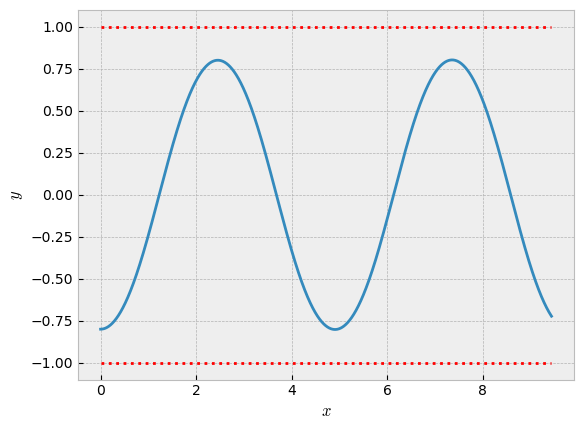

In [3]:
an1, an2 = lightray(0,-0.8,90,20,0.001)
print("an1=", an1, ", an2=", an2)